In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [4]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [6]:
df.shape

(84548, 22)

In [7]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [8]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [9]:
df[df['SALE PRICE'].str.strip()=='-']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84524,8390,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7091,28,,B9,51 CLAY PIT ROAD,...,2,0,2,2986,1820,1999,1,B9,-,2017-07-06 00:00:00
84525,8391,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7091,188,,B9,1576 WOODROW ROAD,...,2,0,2,2490,1530,1998,1,B9,-,2016-10-14 00:00:00
84538,8404,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,61,,B2,178 DARNELL LANE,...,2,0,2,3215,1300,1995,1,B2,-,2017-06-30 00:00:00
84539,8405,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,85,,B2,137 DARNELL LANE,...,2,0,2,3016,1300,1995,1,B2,-,2016-12-30 00:00:00


In [10]:
df.drop(['Unnamed: 0'],
             axis=1,
             inplace=True)

In [11]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [12]:
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [13]:
empty_fields = df[ (df['GROSS SQUARE FEET'].str.strip()=='-') |  (df['LAND SQUARE FEET'].str.strip()=='-')| (df['SALE PRICE'].str.strip()=='-') | (df['SALE PRICE'].str.strip()=='0')].index
df.drop(empty_fields , inplace=True)

In [14]:
total_units_zero = df[ (df['TOTAL UNITS']==0)].index
df.drop(total_units_zero , inplace=True)

In [15]:
df['SALE PRICE'] = df['SALE PRICE'].astype('float')
df['SALE PRICE'] = df['SALE PRICE'].astype('Int64')
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].astype('float')
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].astype('Int64')
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].astype('float')
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].astype('Int64')

In [16]:
df['SALE YEAR'] = pd.DatetimeIndex(df['SALE DATE']).year

In [17]:
df['AGE'] = df['SALE YEAR']-df['YEAR BUILT']

In [18]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,AGE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,2017,117
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,2016,103
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,2016,116
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00,2016,96
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00,2016,96


In [19]:
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                   Int64
GROSS SQUARE FEET                  Int64
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                         Int64
SALE DATE                         object
SALE YEAR                          int64
AGE                                int64
dtype: object

In [20]:
df.nunique()

BOROUGH                               5
NEIGHBORHOOD                        250
BUILDING CLASS CATEGORY              43
TAX CLASS AT PRESENT                  9
BLOCK                             10085
LOT                                1572
EASE-MENT                             1
BUILDING CLASS AT PRESENT           142
ADDRESS                           30324
APARTMENT NUMBER                   1258
ZIP CODE                            180
RESIDENTIAL UNITS                   145
COMMERCIAL UNITS                     41
TOTAL UNITS                         152
LAND SQUARE FEET                   4600
GROSS SQUARE FEET                  4498
YEAR BUILT                          143
TAX CLASS AT TIME OF SALE             3
BUILDING CLASS AT TIME OF SALE      143
SALE PRICE                         5737
SALE DATE                           340
SALE YEAR                             2
AGE                                 147
dtype: int64

In [21]:
import datetime as dt
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE DATE']=df['SALE DATE'].map(dt.datetime.toordinal)

In [22]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,AGE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633,6440,1900,2,C2,6625000,736529,2017,117
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272,6794,1913,2,C4,3936272,736230,2016,103
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369,4615,1900,2,C2,8000000,736285,2016,116
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,1750,4226,1920,2,C4,3192840,736230,2016,96
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,4489,18523,1920,2,D9,16232000,736275,2016,96


In [23]:
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                   Int64
GROSS SQUARE FEET                  Int64
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                         Int64
SALE DATE                          int64
SALE YEAR                          int64
AGE                                int64
dtype: object

In [24]:
df.nunique()

BOROUGH                               5
NEIGHBORHOOD                        250
BUILDING CLASS CATEGORY              43
TAX CLASS AT PRESENT                  9
BLOCK                             10085
LOT                                1572
EASE-MENT                             1
BUILDING CLASS AT PRESENT           142
ADDRESS                           30324
APARTMENT NUMBER                   1258
ZIP CODE                            180
RESIDENTIAL UNITS                   145
COMMERCIAL UNITS                     41
TOTAL UNITS                         152
LAND SQUARE FEET                   4600
GROSS SQUARE FEET                  4498
YEAR BUILT                          143
TAX CLASS AT TIME OF SALE             3
BUILDING CLASS AT TIME OF SALE      143
SALE PRICE                         5737
SALE DATE                           340
SALE YEAR                             2
AGE                                 147
dtype: int64

In [25]:
df.drop('EASE-MENT', axis=1, inplace=True)
df.drop('ZIP CODE', axis=1, inplace=True)
df.drop('ADDRESS', axis=1, inplace=True)
df.drop('APARTMENT NUMBER', axis=1, inplace=True)
df.drop('NEIGHBORHOOD', axis=1, inplace=True)
df.drop('BUILDING CLASS AT PRESENT', axis=1, inplace=True)
df.drop('LOT', axis=1, inplace=True)
df.drop('TAX CLASS AT PRESENT', axis=1, inplace=True)
df.drop('BUILDING CLASS AT TIME OF SALE', axis=1, inplace=True)
df.head()

,BOROUGH,BUILDING CLASS CATEGORY,BLOCK,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,AGE
0,1,07 RENTALS - WALKUP APARTMENTS,392,5,0,5,1633,6440,1900,2,6625000,736529,2017,117
3,1,07 RENTALS - WALKUP APARTMENTS,402,10,0,10,2272,6794,1913,2,3936272,736230,2016,103
4,1,07 RENTALS - WALKUP APARTMENTS,404,6,0,6,2369,4615,1900,2,8000000,736285,2016,116
6,1,07 RENTALS - WALKUP APARTMENTS,406,8,0,8,1750,4226,1920,2,3192840,736230,2016,96
9,1,08 RENTALS - ELEVATOR APARTMENTS,387,24,0,24,4489,18523,1920,2,16232000,736275,2016,96


In [26]:
#df.drop('SALE DATE', axis=1, inplace=True)

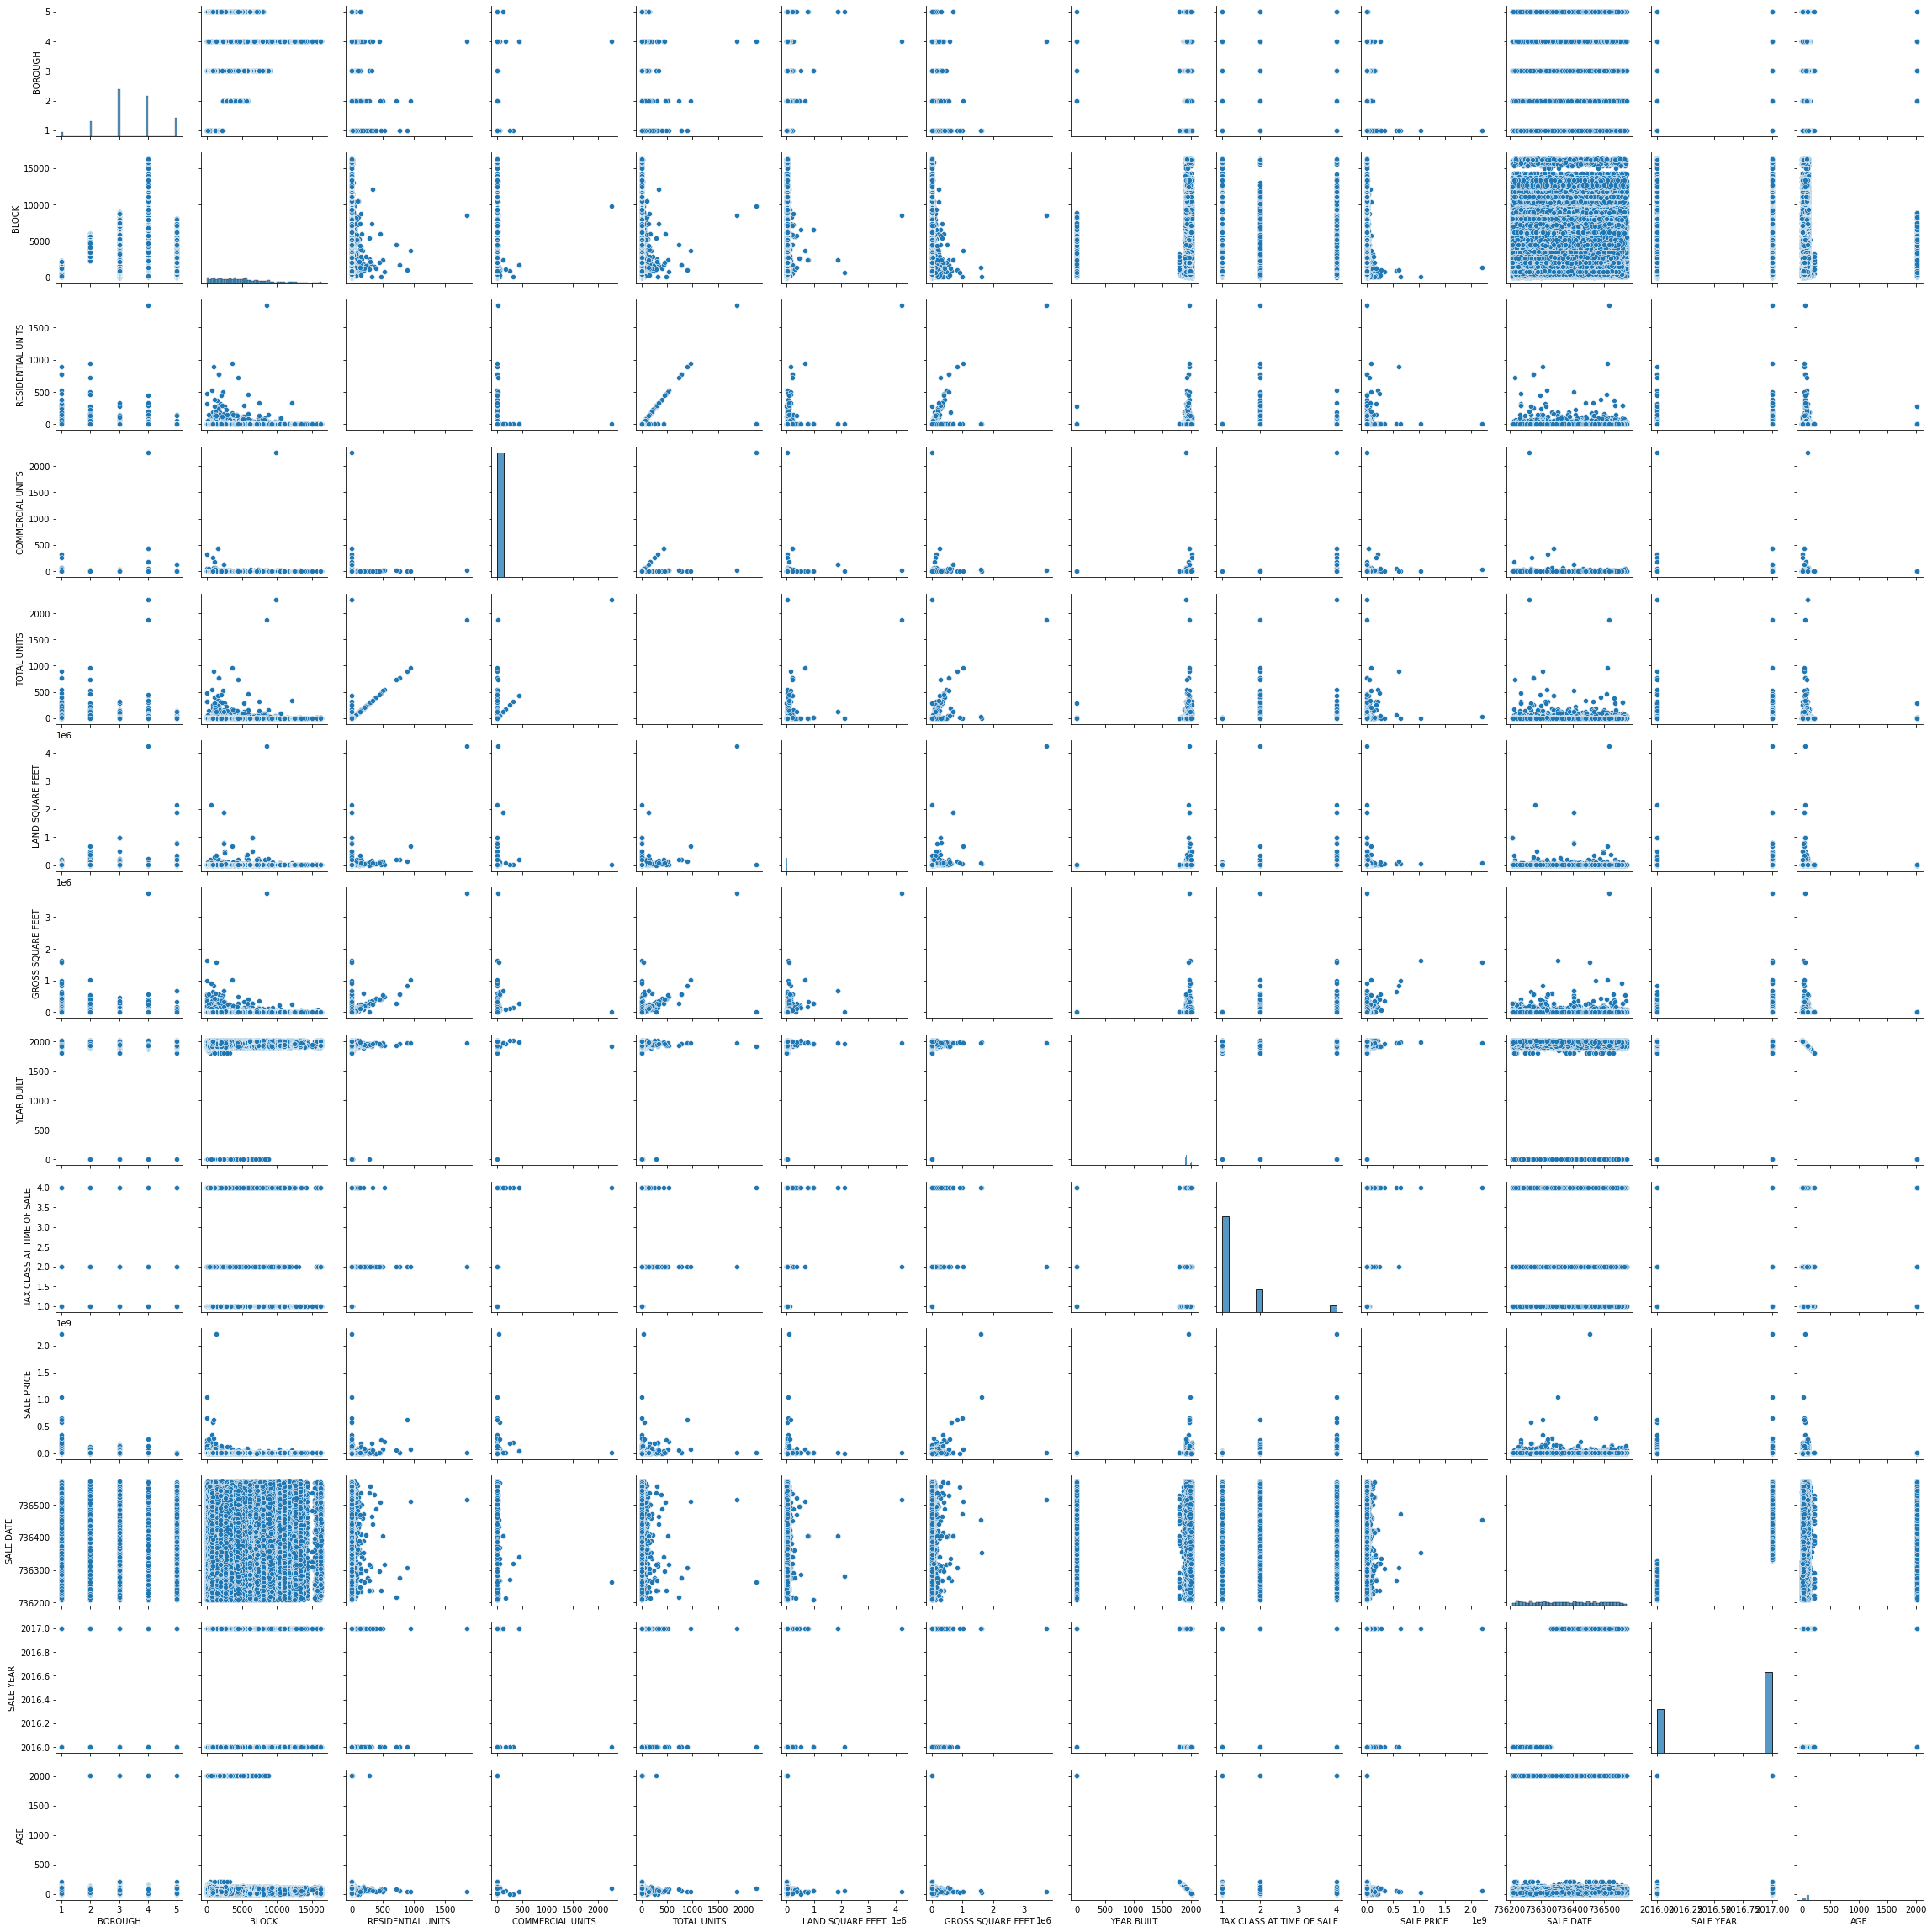

In [27]:
sns.pairplot(df)

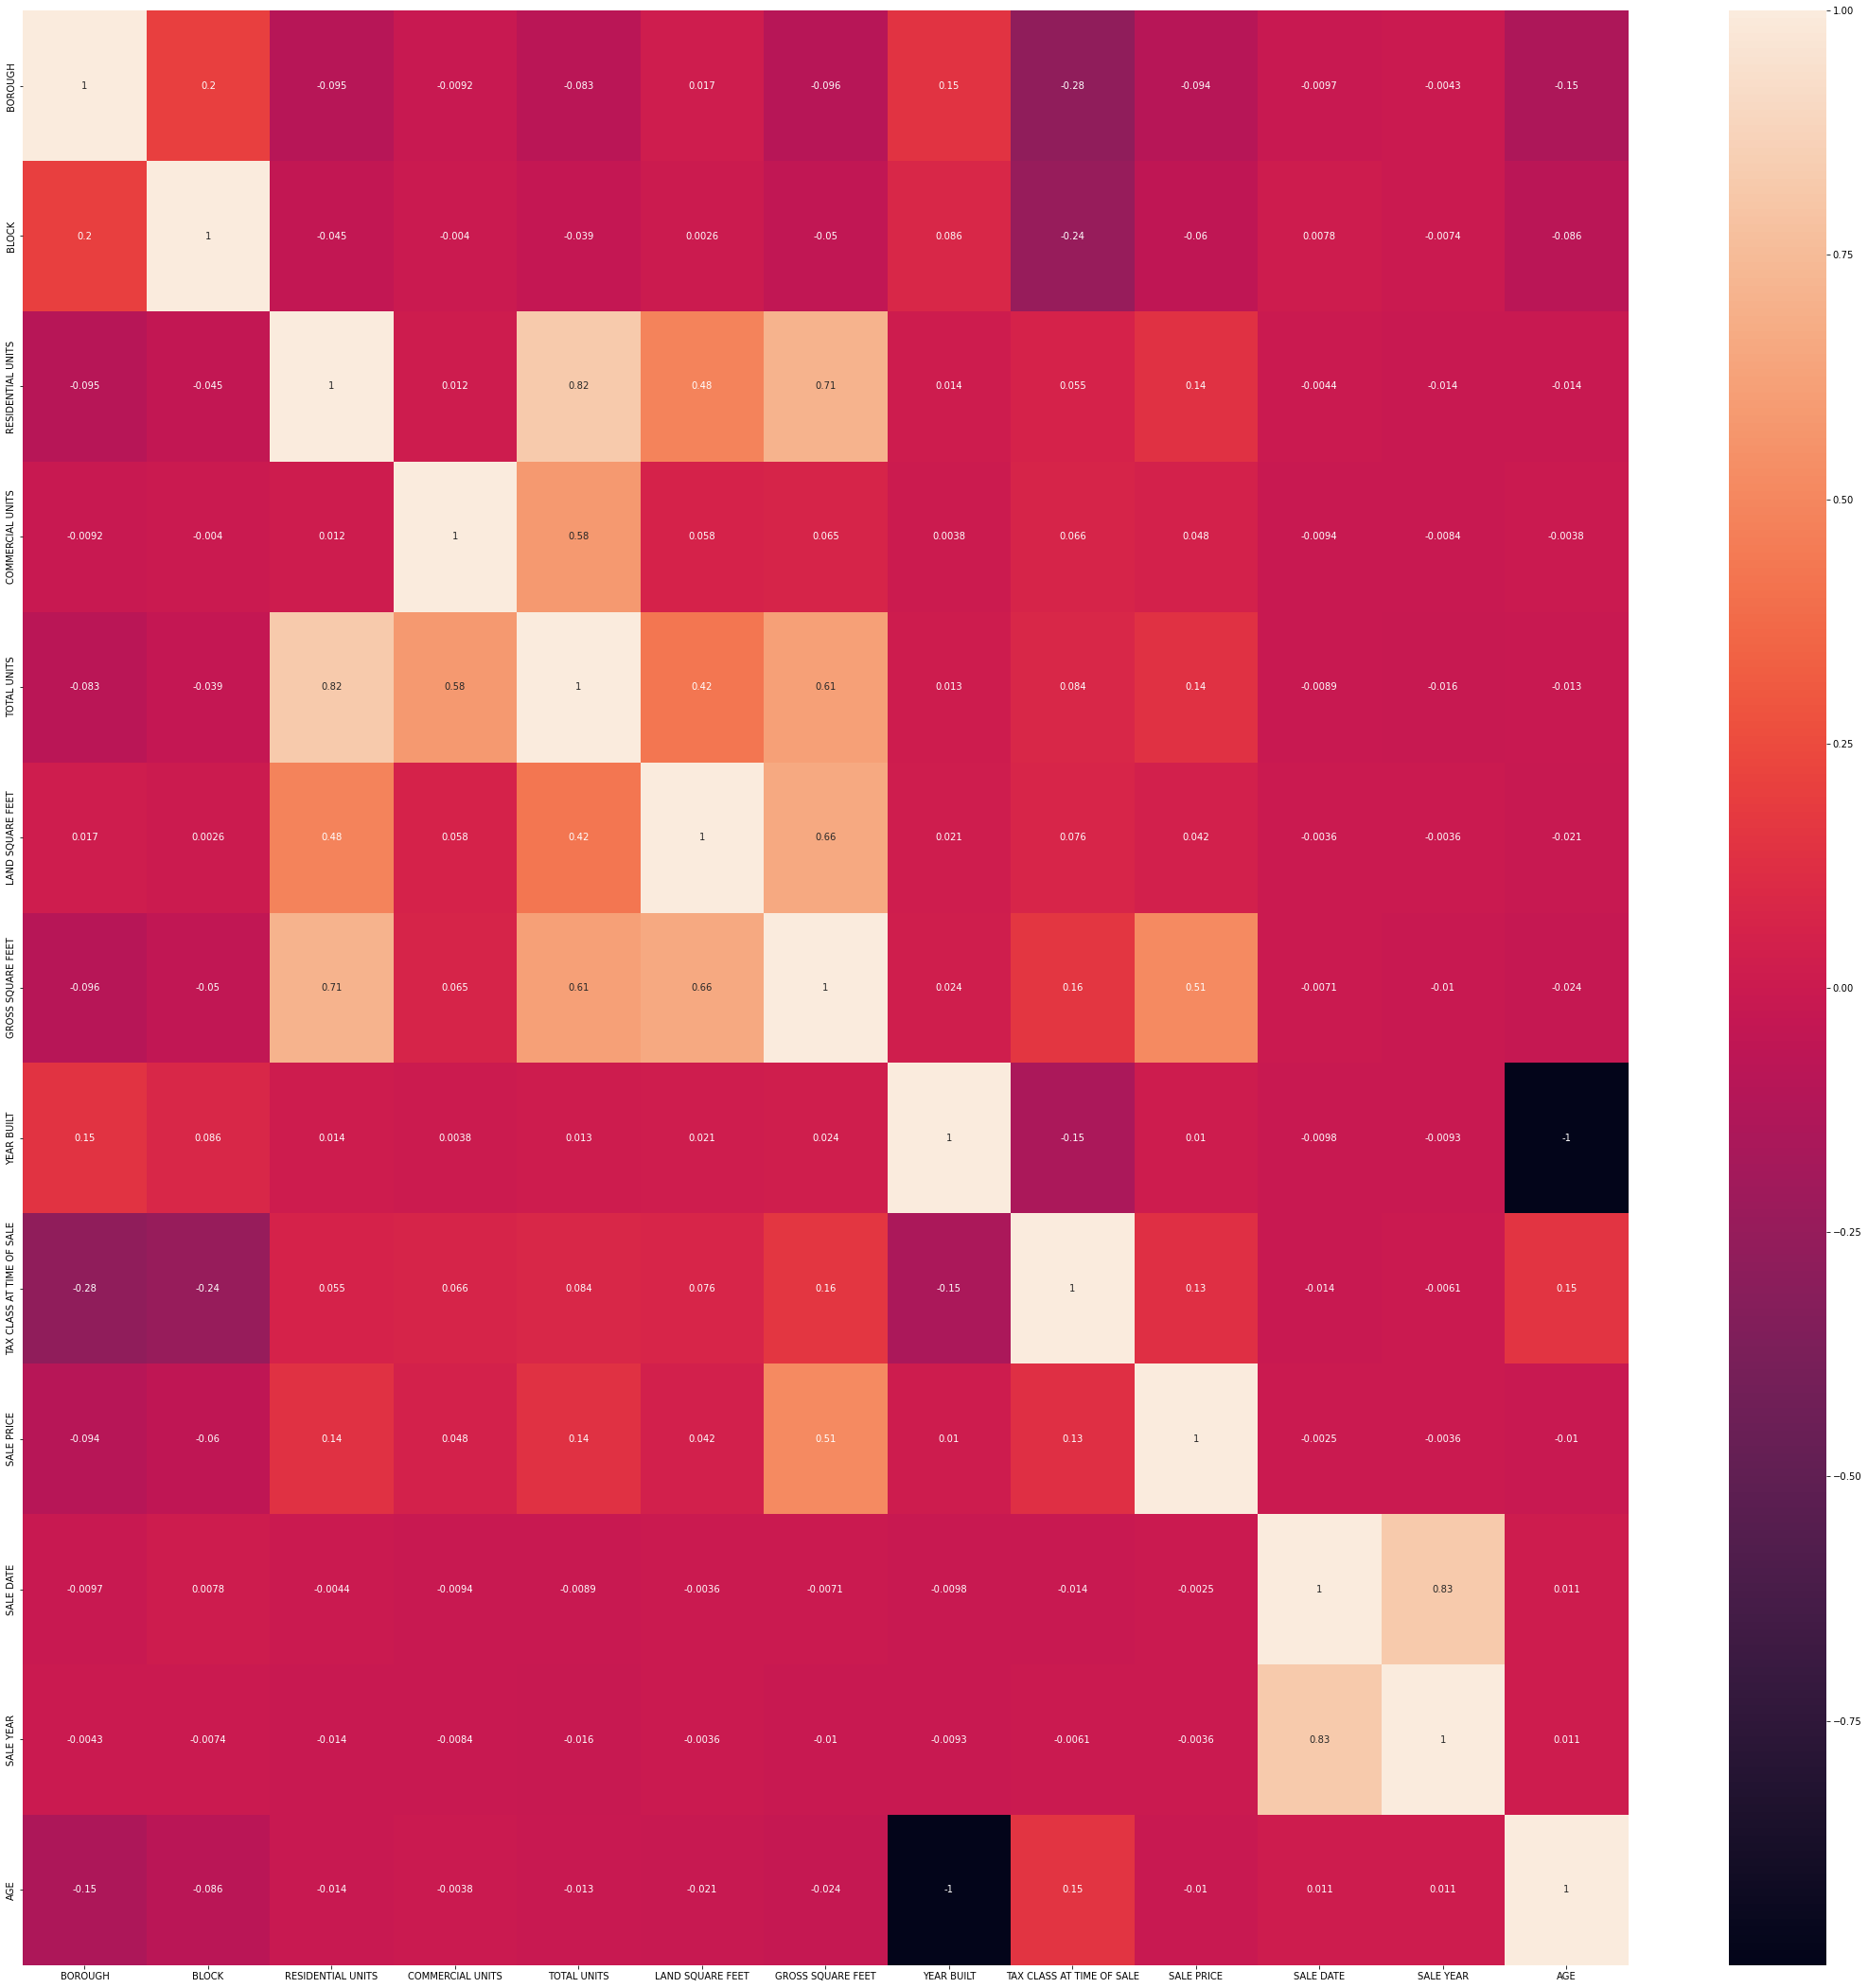

In [28]:
fig, ax = plt.subplots(figsize=(38,38))    
sns.heatmap(df.corr(), annot = True)
plt.show()

In [29]:
df['BOROUGH']=df['BOROUGH'].astype(object)

In [30]:
df.corr().abs().unstack().sort_values(ascending =False )["SALE PRICE"]

SALE PRICE                   1.000000
GROSS SQUARE FEET            0.508522
TOTAL UNITS                  0.139490
RESIDENTIAL UNITS            0.137698
TAX CLASS AT TIME OF SALE    0.131278
BLOCK                        0.059529
COMMERCIAL UNITS             0.047786
LAND SQUARE FEET             0.041713
AGE                          0.010180
YEAR BUILT                   0.010175
SALE YEAR                    0.003565
SALE DATE                    0.002516
dtype: float64

In [81]:
X = df.drop('SALE PRICE', axis=1)
y = df['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
categorical_features = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT TIME OF SALE']


In [83]:
numerical_features = ['RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'AGE']

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numeric_transformer =StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer(transformers = [('numerical', numeric_transformer, numerical_features),('cat',categorical_transformer, categorical_features)])

In [85]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [86]:
X_train_preprocessed_df = pd.DataFrame(data = X_train_preprocessed)

In [87]:
X_train_preprocessed_df.head() 

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.039875,-0.057283,-0.050600,-0.014330,-0.062909,-0.194710,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.096633,-0.057283,-0.105554,-0.102116,-0.116168,-0.317123,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.039875,-0.057283,-0.050600,-0.048240,-0.076945,-0.154854,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.039875,-0.057283,-0.050600,-0.048913,-0.077838,-0.180475,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.357426,3.735986,0.608849,-0.027435,-0.056396,-0.146314,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [88]:
X_test.columns

Index(['BOROUGH', 'BUILDING CLASS CATEGORY', 'BLOCK', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'SALE DATE', 'SALE YEAR', 'AGE'],
      dtype='object')

In [89]:
X_train.columns

Index(['BOROUGH', 'BUILDING CLASS CATEGORY', 'BLOCK', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'SALE DATE', 'SALE YEAR', 'AGE'],
      dtype='object')

In [93]:
X_test_preprocessed_df.shape

(10158, 57)

In [91]:
X_test.shape

(10158, 13)

In [92]:
X_test_preprocessed =  preprocessor.transform(X_test)
X_test_preprocessed_df = pd.DataFrame(data = X_test_preprocessed)
X_test_preprocessed_df.head() 

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.096633,0.484613,0.004354,-0.032111,-0.063111,-0.052368,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.039875,-0.057283,-0.050600,-0.047512,-0.069480,-0.086530,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.096633,-0.057283,-0.105554,0.023892,-0.091383,-0.223178,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.039875,-0.057283,-0.050600,-0.031887,-0.058529,-0.123539,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.096633,-0.057283,-0.105554,-0.055745,-0.067665,-0.180475,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [94]:
from sklearn.metrics import mean_absolute_percentage_error

In [98]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [100]:
scores_lr = cross_val_score(Ridge(), X_train_preprocessed_df, y_train, cv=5, scoring='neg_mean_squared_error')
print("Linear regression cross val score:", scores_lr.mean())

C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to n

Linear regression cross val score: -233979472263073.16


In [96]:
scores_lr = cross_val_score(LinearRegression(), X_train_preprocessed_df, y_train, cv=5, scoring='mean_squared_error')
print("Linear regression cross val score:", scores_lr.mean())

scores_ridge = cross_val_score(Ridge(random_state=42), X_train_preprocessed, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
print("Ridge regression cross val score:", scores_ridge.mean())

scores_lr = cross_val_score(Lasso(random_state=42), X_train_preprocessed, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
print("Lasso cross val score:", scores_lr.mean())

scores_random_forest = cross_val_score(RandomForestRegressor(n_estimators=60, random_state=42), X_train_preprocessed, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
print("Random Forest regression score:", scores_random_forest.mean())

C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to n

Linear regression cross val score: -37410.36449204664
Ridge regression cross val score: -37138.622683771544


C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1339105446820513e+18, tolerance: 686048113720468.8
  model = cd_fast.enet_coordinate_descent(
C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1611910492604943e+18, tolerance: 704153871334974.9
  model = cd_fast.enet_coordinate_descent(
C:\Users\Meenakshi\anacond

Lasso cross val score: -37183.66687440083


C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to n

Random Forest regression score: -22024.74047410717


C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [ ]:
X_train

In [67]:
X_train_preprocessed_df.shape

(23702, 61)

In [95]:
random = RandomForestRegressor(random_state=42)
random.fit(X_train_preprocessed_df, y_train)

mean_absolute_percentage_error(y_test, random.predict(X_test_preprocessed_df))

C:\Users\Meenakshi\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


10499.95387909539

In [63]:
X_test_preprocessed_df.shape

(10158, 60)

In [46]:
X_test_preprocessed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.037817,-0.093198,0.066480,-0.013779,-0.045910,-0.086556,0.056295,-1.263678,-1.371751,-0.058129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.380545,-0.045716,-0.019948,-0.045691,-0.067118,-0.095915,0.090045,-1.456548,-1.371751,-0.091878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.208119,-0.093198,-0.019948,-0.077602,0.031210,-0.128098,0.227858,0.375720,0.728995,-0.226874,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.081209,-0.045716,-0.019948,-0.045691,-0.045602,-0.079823,0.129420,0.809679,0.728995,-0.128440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.461272,-0.093198,-0.019948,-0.077602,-0.078455,-0.093247,0.185670,-0.270395,0.728995,-0.184688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
X_train_preprocessed_df.shape

(23702, 61)

In [51]:
X_train_preprocessed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-1.265354,-0.039875,-0.057283,-0.050600,-0.014330,-0.062909,0.195718,-0.041142,0.739954,-0.194710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.959492,-0.096633,-0.057283,-0.105554,-0.102116,-0.116168,0.318132,0.084570,0.739954,-0.317123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.412035,-0.039875,-0.057283,-0.050600,-0.048240,-0.076945,0.153015,-0.988818,-1.351435,-0.154854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.814932,-0.039875,-0.057283,-0.050600,-0.048913,-0.077838,0.181483,0.935545,0.739954,-0.180475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.929018,0.357426,3.735986,0.608849,-0.027435,-0.056396,0.144475,-1.569028,-1.351435,-0.146314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
